In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

### 1. Dataset

In [244]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]
def make_data():
    N = 200
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y
X, Y = make_data()

# Transformation booléens -> 0 / 1
Y = Y.astype(int)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');
#dataset = pd.read_csv("data.csv")
#dataset

In [245]:
Y=Y.reshape(-1,1)

In [246]:
print(X)

[[ 2.61808687e-01 -2.04327780e-01]
 [ 2.53780222e+00 -3.46922612e-01]
 [ 2.46607024e-01  1.51024228e+00]
 [-1.02471839e+00 -8.38582558e-01]
 [ 2.64699204e-01 -4.15707956e-01]
 [-1.30454987e+00 -4.34676506e-01]
 [-6.31860102e-01  4.45623800e-01]
 [-1.51879657e+00 -8.62955411e-01]
 [ 1.44036291e+00  1.93898290e+00]
 [-1.47956653e+00  4.04199378e-01]
 [-5.89890149e-01 -1.14497985e+00]
 [-7.65064161e-01 -8.36422645e-02]
 [ 9.56650382e-01  5.75716135e-01]
 [ 5.53446187e-02 -1.80178359e-01]
 [ 2.75030289e-01  1.49570948e-02]
 [ 5.79170195e-01 -7.66409590e-01]
 [ 3.44867021e-02 -3.56300644e-01]
 [-1.00368817e-01  6.97408373e-01]
 [-1.38322920e-02  1.56696038e+00]
 [-2.73472493e-01  1.49338752e+00]
 [-3.19879247e-01 -7.78836048e-01]
 [ 7.97222221e-02  6.14802638e-01]
 [ 4.13050906e-01  1.43151760e+00]
 [ 9.78443411e-01  4.65430042e-01]
 [-2.95871679e-01  3.51255636e-02]
 [ 1.68190039e+00  2.13879760e-02]
 [-9.70863515e-01 -7.46808479e-01]
 [-6.27840626e-01  9.10515398e-01]
 [-1.20723002e-01  2

In [247]:
# Affichage dans un DataFrame
dataset = pd.DataFrame(X, columns=['x1', 'x2'])
dataset['label'] = Y
print(dataset.head())

         x1        x2  label
0  0.261809 -0.204328      1
1  2.537802 -0.346923      0
2  0.246607  1.510242      0
3 -1.024718 -0.838583      0
4  0.264699 -0.415708      1


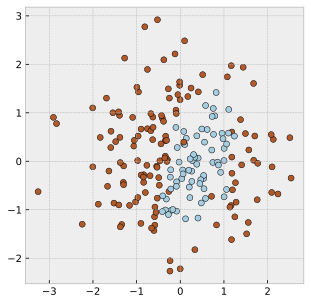

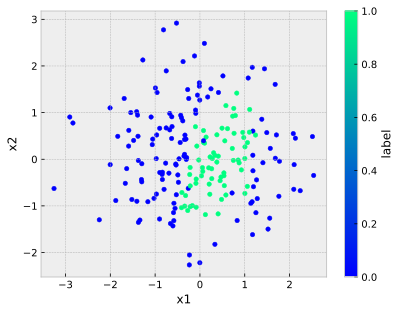

In [248]:
# Visualisation
dataset.plot.scatter(x='x1',y='x2', c='label', colormap='winter')
plt.show()

In [249]:
def mapFeature(X1, X2, degree):
    #res = np.ones(X1.shape[0])
    res = np.zeros((X1.shape[0], 0))
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

In [250]:
degree=2
Poly_X=mapFeature(X[:, 0],X[:, 1],degree)

print(Poly_X.shape)

(200, 5)


In [251]:
print(Poly_X[:10])

[[ 0.26180869 -0.20432778  0.06854379 -0.05349479  0.04174984]
 [ 2.53780222 -0.34692261  6.4404401  -0.88042097  0.1203553 ]
 [ 0.24660702  1.51024228  0.06081502  0.37243635  2.28083174]
 [-1.02471839 -0.83858256  1.05004778  0.85931097  0.70322071]
 [ 0.2646992  -0.41570796  0.07006567 -0.11003757  0.1728131 ]
 [-1.30454987 -0.43467651  1.70185035  0.56705718  0.18894366]
 [-0.6318601   0.4456238   0.39924719 -0.2815719   0.19858057]
 [-1.51879657 -0.86295541  2.30674301  1.31065372  0.74469204]
 [ 1.44036291  1.9389829   2.07464531  2.79283905  3.75965468]
 [-1.47956653  0.40419938  2.18911711 -0.59803987  0.16337714]]


In [252]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(Poly_X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160, 1)
(40, 1)


In [253]:
#print(y_train)

2. Modèle

In [254]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [255]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [256]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

3. Fonction Coût

In [257]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

4. Optimisation - Gradient et Descente de Gradient

In [258]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [259]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

5. Prédiction

In [260]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

6. Modèle final

In [261]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

In [262]:
W,b=regression_logistique(X_train, y_train)

6. 1 Evaluation du modèle et Visualisation

In [263]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",np.round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy= 85.0 %


In [264]:

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  4]
 [ 2  7]]


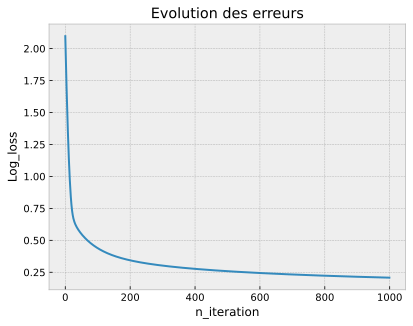

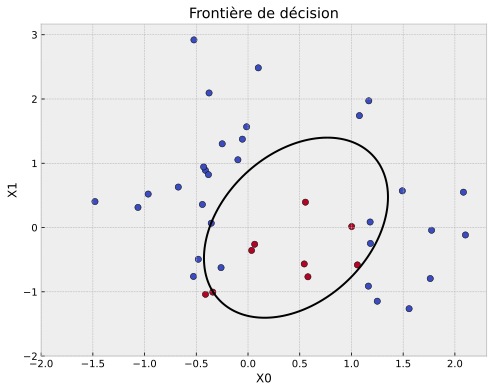

In [265]:
# -------------------------------
# Affichage de la frontière de décision
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolors='k', s=40)

# Grille plus dense et plus large
u = np.linspace(-2, 2, 200)
v = np.linspace(-2, 2, 200)
U, V = np.meshgrid(u, v)

# Vecteurs aplatis
U_flat, V_flat = U.ravel(), V.ravel()

# Projection polynomiale
grid_poly = mapFeature(U_flat, V_flat, degree)

# Calcul de la sortie du modèle
Z = grid_poly.dot(W) + b
Z = Z.reshape(U.shape)

# Affichage des contours
plt.contour(U, V, Z, levels=[0], linewidths=2, colors='black')
plt.title("Frontière de décision")
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid(True)
plt.show()

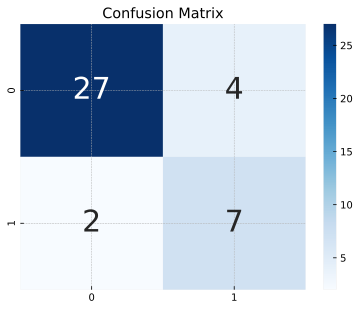

In [266]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()